In [4]:
import torch
import cv2 as cv
import numpy as np
from pathlib import Path
import os
import multiprocessing as mp
from shutil import move as mv_file
import matplotlib.pyplot as plt

In [4]:
torch.has_cuda

True

# Zadanie 1

In [ ]:
def read_image(path: str):
    return cv.imread(path)    

def sort_images():
    processes = []
    cwd = Path.cwd().joinpath('Real')
    dest = Path.cwd().joinpath('data')

    for file in Path.iterdir(cwd):
        print(file)
        subject_number = file.name.split('_')[0]
        subject_folder = dest.joinpath(subject_number)
        if not subject_folder.exists():
            subject_folder.mkdir()
        if subject_folder.exists():
            processes.append(mp.Process(target=mv_file, args=(file, dest.joinpath(subject_number).joinpath(file.name))))

    for process in processes:
        process.start() 

    for process in processes:
        process.join() 


In [ ]:
sort_images()

c:\dev\biometry-masters-class\ps4\data\1\1__M_Left_index_finger.BMP c:\dev\biometry-masters-class\ps4\data\1\1__M_Left_index_finger.BMP


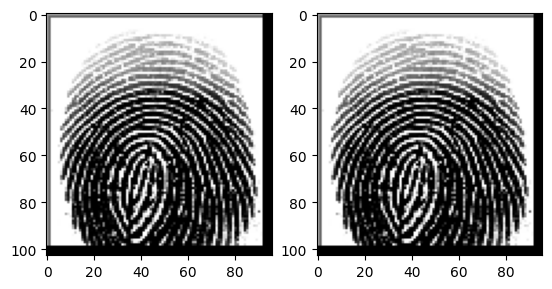

In [45]:
subject_folder_iter = Path.cwd().joinpath('data').joinpath('1').iterdir() 
file_1 = next(subject_folder_iter)
file_2 = file_1
print(file_1, file_2)
file_mat_1 = cv.imread(str(file_1))
file_mat_2 = cv.imread(str(file_2))
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(file_mat_1)
ax2.imshow(file_mat_2)

In [46]:
best_score = counter = 0
sift = cv.SIFT_create()
keypoints_1, des1 = sift.detectAndCompute(file_mat_1, None)
keypoints_2, des2 = sift.detectAndCompute(file_mat_2, None)

matches = cv.FlannBasedMatcher({'algorithm': 1, 'trees': 10}, {}).knnMatch(
    des1, des2, k=2
)

match_points = []
for p, q in matches:
    if p.distance < 0.1 * q.distance:
        match_points.append(p)
print(match_points)

[< cv2.DMatch 000001773A10BC50>, < cv2.DMatch 0000017739A792B0>, < cv2.DMatch 000001773A21ED90>, < cv2.DMatch 000001773F562510>, < cv2.DMatch 000001773F561F70>, < cv2.DMatch 000001773F562010>, < cv2.DMatch 000001773F561E50>, < cv2.DMatch 000001773F561D10>, < cv2.DMatch 000001773F5620F0>, < cv2.DMatch 000001773F562090>, < cv2.DMatch 000001773F5620B0>, < cv2.DMatch 000001773F561EF0>, < cv2.DMatch 000001773F5622B0>, < cv2.DMatch 000001773F562070>, < cv2.DMatch 000001773F5620D0>, < cv2.DMatch 000001773F562550>, < cv2.DMatch 000001773F562430>, < cv2.DMatch 000001773F5624B0>, < cv2.DMatch 000001773F5623D0>, < cv2.DMatch 000001773F562570>, < cv2.DMatch 000001773F5625B0>, < cv2.DMatch 000001773F5625F0>, < cv2.DMatch 000001773F562630>, < cv2.DMatch 000001773F562670>, < cv2.DMatch 000001773F5626B0>, < cv2.DMatch 000001773F5626F0>, < cv2.DMatch 000001773F562730>, < cv2.DMatch 000001773F562770>, < cv2.DMatch 000001773F5627B0>, < cv2.DMatch 000001773F5627F0>, < cv2.DMatch 000001773F562830>, < cv2.D

Best match:  c:\dev\biometry-masters-class\ps4\data\1\1__M_Left_index_finger.BMP
Best score:  100.0


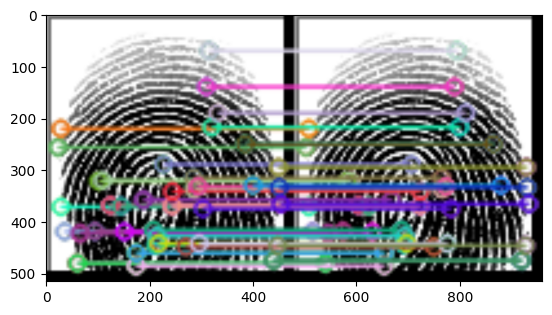

In [50]:

keypoints = 0
if len(keypoints_1) <= len(keypoints_2):
    keypoints = len(keypoints_1)
else:
    keypoints = len(keypoints_2)
if len(match_points) / keypoints * 100 > best_score:
    best_score = len(match_points) / keypoints * 100
    filename = file_1
    image = file_mat_1
    kp1, kp2, mp = keypoints_1, keypoints_2, match_points

print("Best match:  " + str(filename))
print("Best score:  " + str(best_score))

if len(match_points) > 0:
    result = cv.drawMatches(file_mat_1, kp1, image, kp2, mp, None)
    result = cv.resize(result, None, fx=5, fy=5)
    image = cv.cvtColor(result, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

# Zadanie 2